# Data PreProcessing

### Importing the Libraries

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import re
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import networkx as nx
import warnings
warnings.filterwarnings('ignore')

### Data Frame Creation

In [33]:
basket = pd.read_csv("dataset.csv")
basket.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [34]:
basket.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [35]:
basket.Description = basket.Description.transform(lambda x: [x])
basket.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,[WHITE HANGING HEART T-LIGHT HOLDER],6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,[WHITE METAL LANTERN],6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,[CREAM CUPID HEARTS COAT HANGER],8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,[KNITTED UNION FLAG HOT WATER BOTTLE],6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,[RED WOOLLY HOTTIE WHITE HEART.],6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [36]:
basket.shape #to show the number of rows and columns in the dataset

(541909, 8)

In [37]:
basket.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,[WHITE HANGING HEART T-LIGHT HOLDER],6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,[WHITE METAL LANTERN],6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,[CREAM CUPID HEARTS COAT HANGER],8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,[KNITTED UNION FLAG HOT WATER BOTTLE],6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,[RED WOOLLY HOTTIE WHITE HEART.],6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### Encoding data

In [38]:
basket.Description=basket.Description = basket.Description.transform(lambda x: [x])
encoder=TransactionEncoder()
transactions = pd.DataFrame(encoder.fit(basket).transform(basket), columns=encoder.columns_)
display(transactions.head())

,C,D,I,N,P,Q,S,U,a,c,...,m,n,o,p,r,s,t,u,v,y
0,False,False,True,True,False,False,False,False,False,True,...,False,True,True,False,False,False,False,False,True,False
1,True,False,False,False,False,False,True,False,False,True,...,False,False,True,False,False,False,True,False,False,False
2,False,True,False,False,False,False,False,False,False,True,...,False,True,True,True,True,True,True,False,False,False
3,False,False,False,False,False,True,False,False,True,False,...,False,True,False,False,False,False,True,True,False,True
4,False,True,True,False,False,False,False,False,True,True,...,False,True,True,False,False,False,True,False,True,False


array([[<Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'UnitPrice'}>,
        <Axes: title={'center': 'CustomerID'}>]], dtype=object)

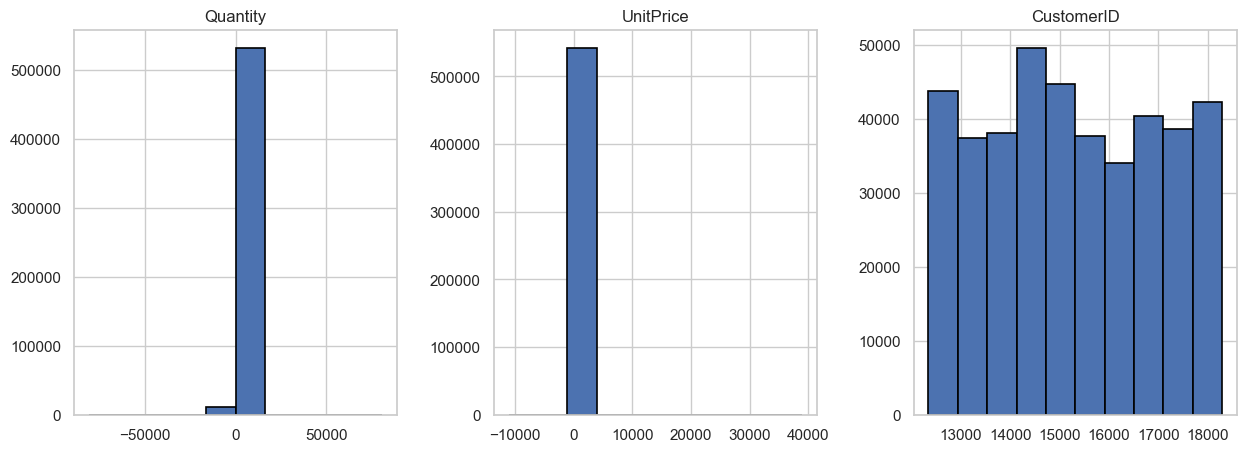

In [39]:
basket.hist(figsize=(15,5), edgecolor='Black', linewidth=1.2, layout=(1,3))

# Implementing the Apriori Algorithm

In [40]:
frequent_itemsets = apriori(transactions, min_support= 2/len(basket), use_colnames=True, max_len = 2)
rules = association_rules(frequent_itemsets, metric="lift",  min_threshold = 1.5)
display(rules.head())
print("Rules identified: ", len(rules))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(e),(C),0.000011,0.000006,0.000004,0.333333,60212.111111,0.000004,1.499992,0.999994
1,(C),(e),0.000006,0.000011,0.000004,0.666667,60212.111111,0.000004,2.999967,0.999989
2,(o),(C),0.000011,0.000006,0.000006,0.500000,90318.166667,0.000006,1.999989,1.000000
3,(C),(o),0.000006,0.000011,0.000006,1.000000,90318.166667,0.000006,inf,0.999994
4,(r),(C),0.000007,0.000006,0.000004,0.500000,90318.166667,0.000004,1.999989,0.999996


Rules identified:  122


## Data Visualisation

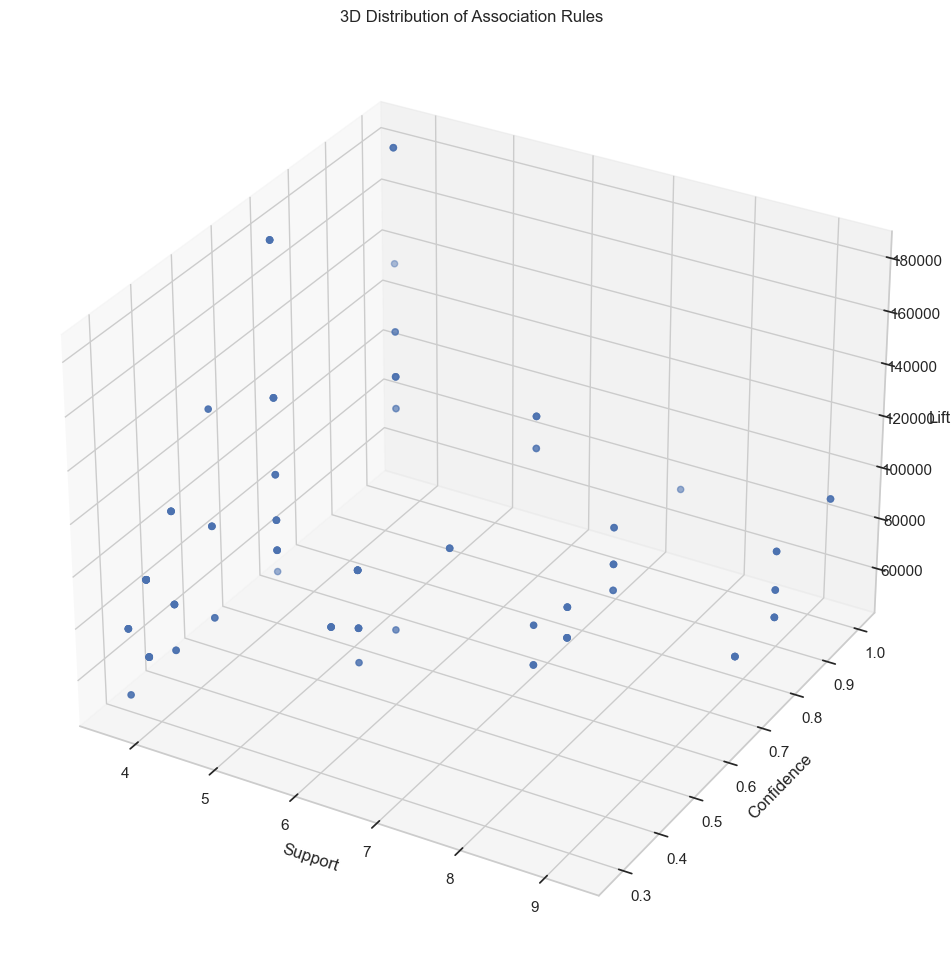

In [41]:
sns.set(style = "whitegrid")
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection = '3d')


x = rules['support']
y = rules['confidence']
z = rules['lift']

ax.set_xlabel("Support")
ax.set_ylabel("Confidence")
ax.set_zlabel("Lift")

ax.scatter(x, y, z)
ax.set_title("3D Distribution of Association Rules")

plt.show()

## Network Analysis of Dataset

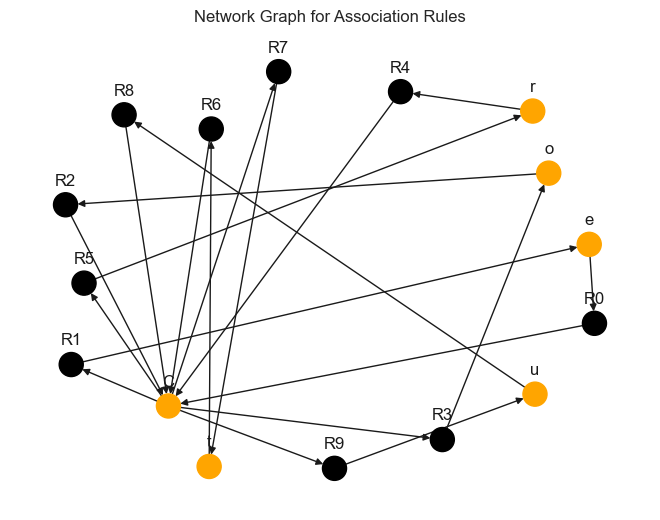

In [47]:
def draw_network(rules, rules_to_show):
  # Directional Graph from NetworkX
  network = nx.DiGraph()
  
  # Loop through number of rules to show
  for i in range(rules_to_show):
    
    # Add a Rule Node
    network.add_nodes_from(["R"+str(i)])
    for antecedents in rules.iloc[i]['antecedents']: 
        # Add antecedent node and link to rule
        network.add_nodes_from([antecedents])
        network.add_edge(antecedents, "R"+str(i),  weight = 2)
      
    for consequents in rules.iloc[i]['consequents']:
        # Add consequent node and link to rule
        network.add_nodes_from([consequents])
        network.add_edge("R"+str(i), consequents,  weight = 2)

  color_map=[]  
  
  # For every node, if it's a rule, colour as Black, otherwise Orange
  for node in network:
       if re.compile("^[R]\d+$").fullmatch(node) != None:
            color_map.append('black')
       else:
            color_map.append('orange')
  
  # Position nodes using spring layout
  pos = nx.spring_layout(network, k=16, scale=1)
  # Draw the network graph
  nx.draw(network, pos, node_color = color_map, font_size=8)            
  
  # Shift the text position upwards
  for p in pos:  
      pos[p][1] += 0.12

  nx.draw_networkx_labels(network, pos)
  plt.title("Network Graph for Association Rules")
  plt.show()

draw_network(rules, 10)

## Analyzing seperate country's markets
### 1)Germany

In [43]:
basket[basket['Country']=='Germany']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1109,536527,22809,[[SET OF 6 T-LIGHTS SANTA]],6,12/1/2010 13:04,2.95,12662.0,Germany
1110,536527,84347,[[ROTATING SILVER ANGELS T-LIGHT HLDR]],6,12/1/2010 13:04,2.55,12662.0,Germany
1111,536527,84945,[[MULTI COLOUR SILVER T-LIGHT HOLDER]],12,12/1/2010 13:04,0.85,12662.0,Germany
1112,536527,22242,[[5 HOOK HANGER MAGIC TOADSTOOL]],12,12/1/2010 13:04,1.65,12662.0,Germany
1113,536527,22244,[[3 HOOK HANGER MAGIC GARDEN]],12,12/1/2010 13:04,1.95,12662.0,Germany
...,...,...,...,...,...,...,...,...
541801,581578,22993,[[SET OF 4 PANTRY JELLY MOULDS]],12,12/9/2011 12:16,1.25,12713.0,Germany
541802,581578,22907,[[PACK OF 20 NAPKINS PANTRY DESIGN]],12,12/9/2011 12:16,0.85,12713.0,Germany
541803,581578,22908,[[PACK OF 20 NAPKINS RED APPLES]],12,12/9/2011 12:16,0.85,12713.0,Germany
541804,581578,23215,[[JINGLE BELL HEART ANTIQUE SILVER]],12,12/9/2011 12:16,2.08,12713.0,Germany


### Data Cleaning

In [48]:
basket.duplicated()

TypeError: unhashable type: 'list'

In [ ]:
mybasket_ger = (basket[basket['Country'] =="Germany"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))